# import important librarys

In [316]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import json
import re
from random import choice, randint, sample
from datetime import datetime, timedelta
import plotly.express as px
import streamlit as st

# Convert file extension to Excel

In [4]:
with open('preparedJobs.js', 'r', encoding='utf-8') as f:
    raw = f.read()
match = re.search(r'\[\s*{.*}\s*\]', raw, re.DOTALL)
json_like = match.group(0)
json_like = re.sub(r"(\w+):", r'"\1":', json_like)  
json_like = json_like.replace("'", '"')             
data = json.loads(json_like)
df = pd.DataFrame(data)
df.to_excel('output.xlsx', index=False, engine='openpyxl') 

# inspect data

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319 entries, 0 to 10318
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job_Title         10319 non-null  object 
 1   Job_Description   10319 non-null  object 
 2   Required_Skills   10319 non-null  object 
 3   Location          10319 non-null  object 
 4   Company           10319 non-null  object 
 5   Experience_Level  10319 non-null  object 
 6   Industry          10319 non-null  object 
 7   Job_Type          10319 non-null  object 
 8   Job_Workplace     10319 non-null  object 
 9   Date_Posted       10319 non-null  object 
 10  Expired_Date      10319 non-null  object 
 11  source            319 non-null    object 
 12  min_salary        10319 non-null  float64
 13  max_salary        10319 non-null  float64
 14  currency          10319 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Job_Title,Job_Description,Required_Skills,Salary_Range,Location,Company,Experience_Level,Industry,Job_Type,Job_Workplace,Date_Posted,Expired_Date,source
count,326,326,326,326,326,326,326,326,326,326,326,326,326
unique,74,232,136,28,12,83,11,40,3,8,16,16,1
top,IT Support Specialist,"Provide technical support, troubleshoot hardwa...","[Windows, Troubleshooting, Active Directory, I...","{'min': 40000, 'max': 70000, 'currency': '£'}",Birmingham,Data Insights,"[Mid-Level, Senior]",Support,[Full-Time],"[On-site, Hybrid]",2025-05-16,2025-06-16,public
freq,14,7,13,95,43,15,113,27,184,150,27,27,326


# clean data

In [35]:
def removepracets(df,col_name):
  df[col_name] = df[col_name].astype(str).str.replace(r'[\[\]]', '', regex=True)
  df[col_name] = df[col_name].str.replace(r"\'", '', regex=True)
removepracets(df,'Required_Skills')  
removepracets(df,'Job_Type')
removepracets(df,'Job_Workplace')

In [41]:
df['Salary_Range']=df['Salary_Range'].astype(str).str.replace(r'[{}]', '',regex=True)
df['Salary_Range']=df['Salary_Range'].str.replace(r"\'",'',regex=True) 

,Job_Title,Job_Description,Required_Skills,Salary_Range,Location,Company,Experience_Level,Industry,Job_Type,Job_Workplace,Date_Posted,Expired_Date,source
0,Software Engineer,Develop software applications using various pr...,"Java, Python","min: 40000, max: 70000, currency: £",London,ABC Tech,"Entry-Level, Senior",Technology,"Full-Time, Part-Time","Hybrid, Remote",2025-05-04,2025-06-04,public
1,Data Analyst,Analyze data sets to provide actionable insights.,"SQL, Excel","min: 40000, max: 70000, currency: £",Manchester,XYZ Analytics,"Junior, Mid-Level",Analytics,Full-Time,"On-site, Remote",2025-05-06,2025-06-06,public
2,Network Engineer,Maintain and optimize network systems.,"Cisco, WAN","min: 40000, max: 70000, currency: £",Birmingham,Network Solutions,Mid-Level,Networking,Full-Time,On-site,2025-05-11,2025-06-11,public
3,Cloud Architect,Design and implement cloud infrastructure solu...,"AWS, Azure","min: 40000, max: 70000, currency: £",Edinburgh,Cloud Innovators,Senior,Cloud Computing,"Full-Time, Freelance",Remote,2025-05-03,2025-06-03,public
4,Cybersecurity Analyst,Protect data and systems from cyber threats.,Cybersecurity,"min: 40000, max: 70000, currency: £",Glasgow,SecureGuard,"Mid-Level, Senior",Security,Full-Time,"On-site, Hybrid",2025-05-03,2025-06-03,public


In [84]:
df['min_salary'] = df['Salary_Range'].str.extract(r'min:\s*(\d+)', expand=False).astype(float)
df['max_salary'] = df['Salary_Range'].str.extract(r'max:\s*(\d+)', expand=False).astype(float)
df['currency'] = df['Salary_Range'].str.extract(r'currency:\s*(\S+)', expand=False)
df.head()

,Job_Title,Job_Description,Required_Skills,Salary_Range,Location,Company,Experience_Level,Industry,Job_Type,Job_Workplace,Date_Posted,Expired_Date,source,min_salary,max_salary,currency
0,Software Engineer,Develop software applications using various pr...,"Java, Python","min: 40000, max: 70000, currency: £",London,ABC Tech,"Entry-Level, Senior",Technology,"Full-Time, Part-Time","Hybrid, Remote",2025-05-04,2025-06-04,public,40000.0,70000.0,£
1,Data Analyst,Analyze data sets to provide actionable insights.,"SQL, Excel","min: 40000, max: 70000, currency: £",Manchester,XYZ Analytics,"Junior, Mid-Level",Analytics,Full-Time,"On-site, Remote",2025-05-06,2025-06-06,public,40000.0,70000.0,£
2,Network Engineer,Maintain and optimize network systems.,"Cisco, WAN","min: 40000, max: 70000, currency: £",Birmingham,Network Solutions,Mid-Level,Networking,Full-Time,On-site,2025-05-11,2025-06-11,public,40000.0,70000.0,£
3,Cloud Architect,Design and implement cloud infrastructure solu...,"AWS, Azure","min: 40000, max: 70000, currency: £",Edinburgh,Cloud Innovators,Senior,Cloud Computing,"Full-Time, Freelance",Remote,2025-05-03,2025-06-03,public,40000.0,70000.0,£
4,Cybersecurity Analyst,Protect data and systems from cyber threats.,Cybersecurity,"min: 40000, max: 70000, currency: £",Glasgow,SecureGuard,"Mid-Level, Senior",Security,Full-Time,"On-site, Hybrid",2025-05-03,2025-06-03,public,40000.0,70000.0,£


In [135]:
df.isna().sum()

Job_Title               0
Job_Description         0
Required_Skills         0
Location                0
Company                 0
Experience_Level        0
Industry                0
Job_Type                0
Job_Workplace           0
Date_Posted             0
Expired_Date            0
source              10000
min_salary              0
max_salary              0
currency                0
dtype: int64

In [249]:
df['source'].fillna(df.source.mode()[0],inplace=True)
df.isna().sum()

Job_Title               0
Job_Description         0
Required_Skills         0
Location                0
Company                 0
Experience_Level        0
Industry                0
Job_Type                0
Job_Workplace           0
Date_Posted             0
Expired_Date            0
source                  0
min_salary              0
max_salary              0
currency                0
Simplified_Workplace    0
dtype: int64

In [139]:
df.drop_duplicates(inplace=True)
print("After drop duplicates")
print(df.duplicated().sum())

After drop duplicates
0


In [141]:
df['Date_Posted']=pd.to_datetime(df['Date_Posted'])
df['Date_Posted'].dtype

dtype('<M8[ns]')

In [243]:
df['Expired_Date']=pd.to_datetime(df['Expired_Date'])
df['Expired_Date'].dtype

dtype('<M8[ns]')

In [147]:
df.drop('Salary_Range',axis=1,inplace=True)

In [149]:
df.dtypes

Job_Title                   object
Job_Description             object
Required_Skills             object
Location                    object
Company                     object
Experience_Level            object
Industry                    object
Job_Type                    object
Job_Workplace               object
Date_Posted         datetime64[ns]
Expired_Date        datetime64[ns]
source                      object
min_salary                 float64
max_salary                 float64
currency                    object
dtype: object

# Publish Date Salary Analysis: Compare minimum and maximum salaries by  experience

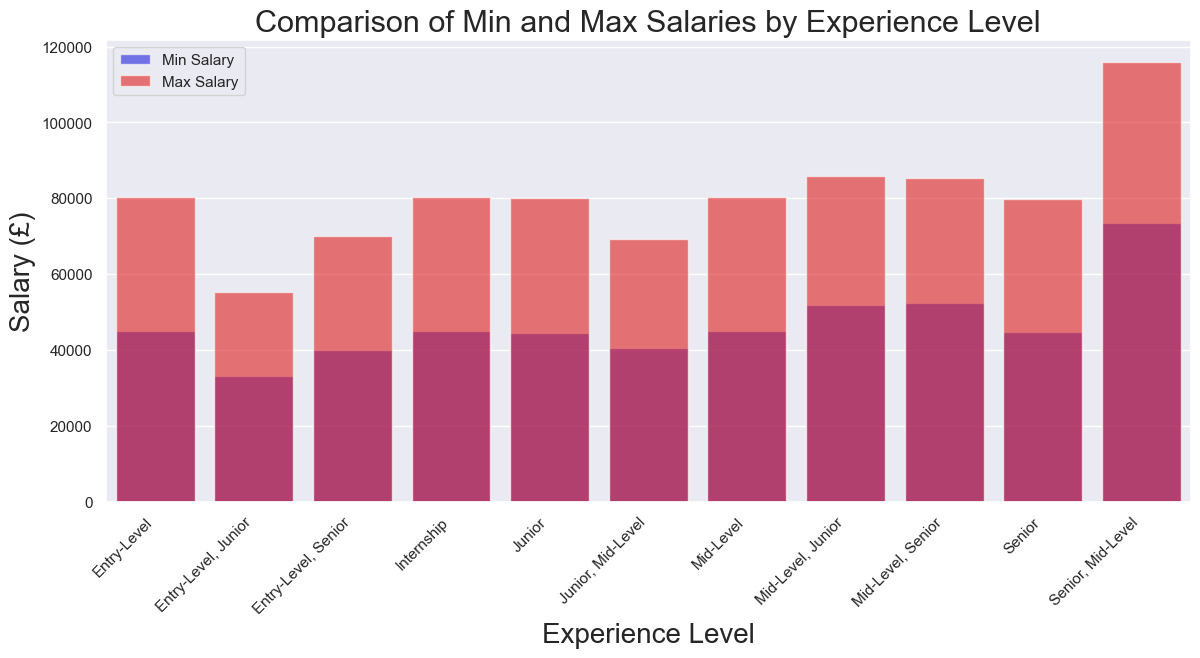

In [193]:
mean_salary=df.groupby('Experience_Level').agg({'min_salary':'mean',"max_salary":'mean'}).reset_index()
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6))  
sns.barplot(x='Experience_Level', y='min_salary', data=mean_salary, color='blue', label='Min Salary', alpha=0.6)
sns.barplot(x='Experience_Level', y='max_salary', data=mean_salary, color='red', label='Max Salary', alpha=0.6)
plt.title('Comparison of Min and Max Salaries by Experience Level', fontsize=22)
plt.xlabel('Experience Level', fontsize=20)
plt.ylabel('Salary (£)', fontsize=20)
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.show()

# Geographic distribution analysis

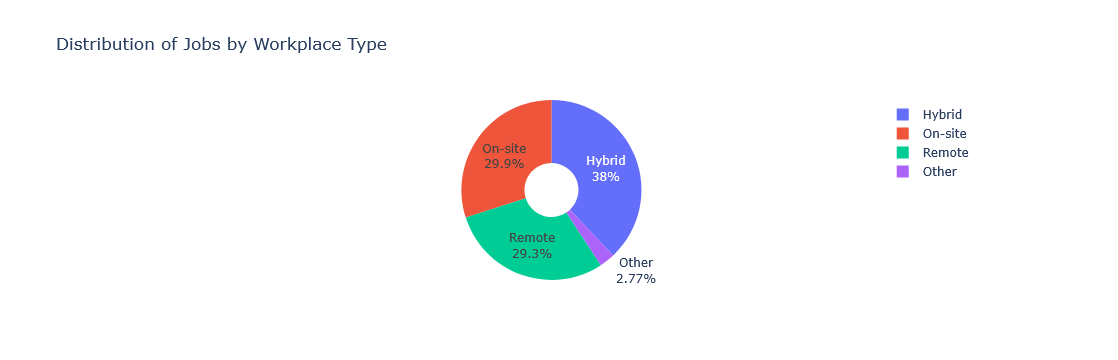

In [219]:

def simplify_workplace(workplace):
    if workplace in ['On-site', 'Remote', 'Hybrid']:
        return workplace
    else:
        return 'Other'


df['Simplified_Workplace'] = df['Job_Workplace'].apply(simplify_workplace)


workplace_counts = df['Simplified_Workplace'].value_counts().reset_index()
workplace_counts.columns = ['Simplified_Workplace', 'Count']

fig = px.pie(workplace_counts, names='Simplified_Workplace', values='Count',
             title='Distribution of Jobs by Workplace Type',
             hole=0.3)  
fig.update_traces(textinfo='percent+label')
fig.show()

# Salary calculation according to job type

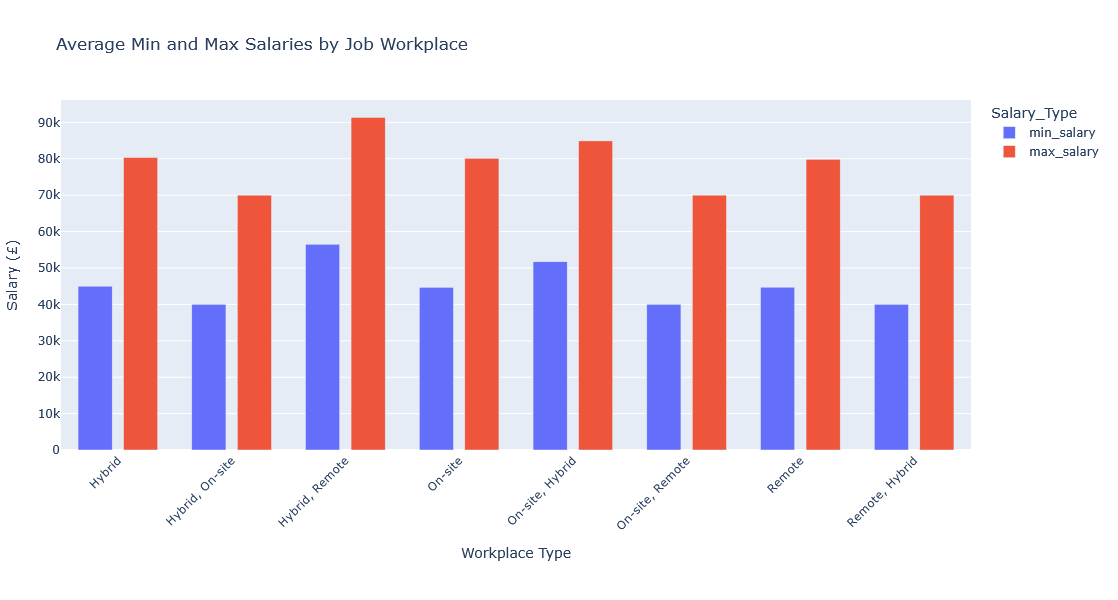

In [279]:


df_cleaned = df.groupby('Job_Workplace').agg({'min_salary': 'mean', 'max_salary': 'mean'}).reset_index()

df_melted = pd.melt(df_cleaned, id_vars=['Job_Workplace'], value_vars=['min_salary', 'max_salary'], var_name='Salary_Type', value_name='Salary')

fig = px.bar(df_melted, x='Job_Workplace', y='Salary', color='Salary_Type', title='Average Min and Max Salaries by Job Workplace', labels={'Salary': 'Salary (£)', 'Job_Workplace': 'Workplace Type'}, barmode='group')

fig.update_layout(height=600, width=1000, xaxis_tickangle=-45, margin=dict(l=50, r=50, t=100, b=150))

fig.update_traces(width=0.3)

fig.show()

# Top 20 Required Skills

C:\Users\user\AppData\Local\Temp\ipykernel_14756\3592177917.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




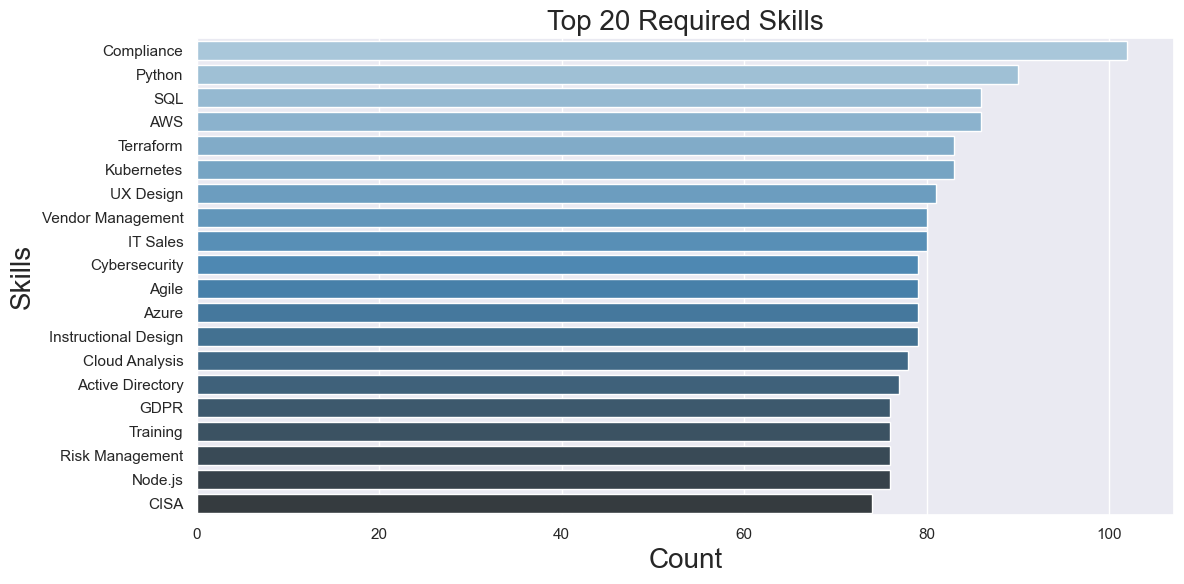

In [294]:
most_skills=df.Required_Skills.str.split(", ").explode().value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_skills.values, y=most_skills.index, palette='Blues_d')
plt.title("Top 20 Required Skills", fontsize=20)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Skills", fontsize=20)
plt.tight_layout()
plt.show()

# Relationship between the extent of experience and the way of performing work

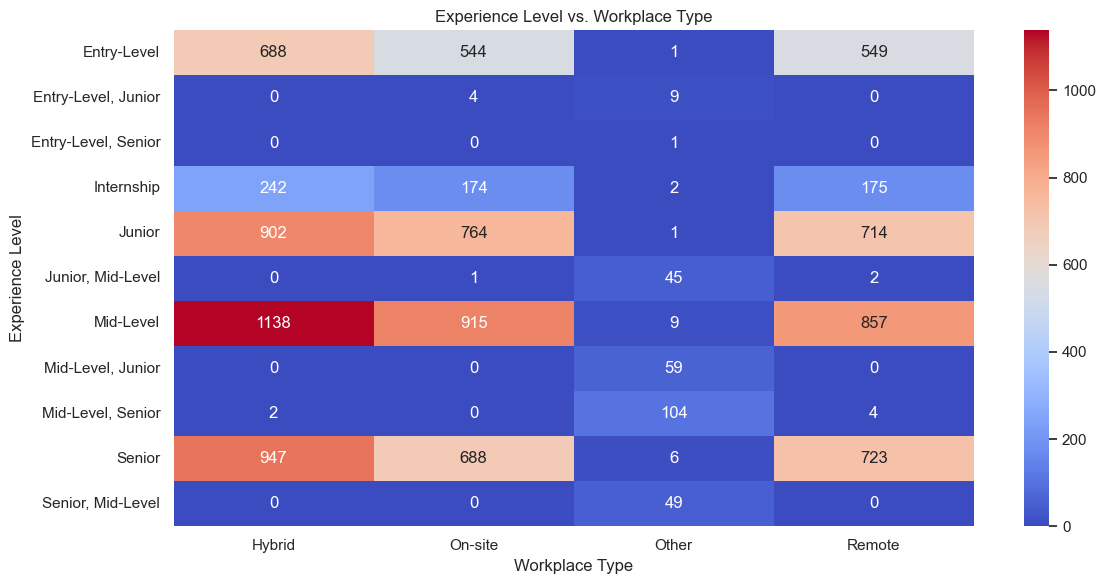

In [313]:
ct = pd.crosstab(df['Experience_Level'], df['Simplified_Workplace'])
plt.figure(figsize=(12, 6))
sns.heatmap(ct, annot=True, cmap='coolwarm', fmt='d')
plt.title('Experience Level vs. Workplace Type')
plt.ylabel('Experience Level')
plt.xlabel('Workplace Type')
plt.tight_layout()
plt.show()

# Top 10 Industries by Workplace Type

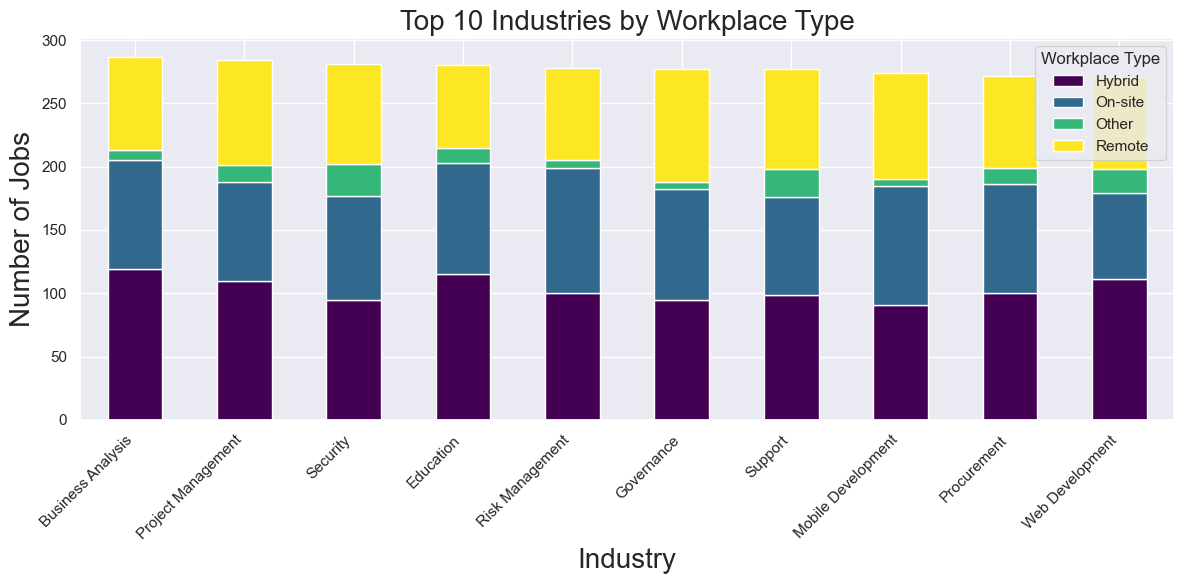

In [318]:

df_industry = df[['Industry', 'Simplified_Workplace']]

industry_workplace = pd.crosstab(df_industry['Industry'], df_industry['Simplified_Workplace'])


industry_workplace = industry_workplace.loc[industry_workplace.sum(axis=1).nlargest(10).index]

industry_workplace.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Top 10 Industries by Workplace Type',fontsize=20)
plt.xlabel('Industry',fontsize=20)
plt.ylabel('Number of Jobs',fontsize=20)
plt.legend(title='Workplace Type')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()